# SUAYBAGUIO, KEAN IVAN S. 

# PART 1

# Classification: Support Vector Machine

In [1]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [2]:
clf.predict([[2., 2.]])

array([1])

In [3]:
# get support vectors
clf.support_vectors_
# get indices of support vectors
clf.support_
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

In [4]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)
dec = clf.decision_function([[1]])
dec.shape[1] # 6 classes: 4*3/2 = 6
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

In [5]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)
dec = lin_clf.decision_function([[1]])
dec.shape[1]

/Users/keanivansuaybaguio/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


4

In [6]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(X, y)
regr.predict([[1, 1]])

array([1.5])

# Regression: Decision Tree Regression

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())

In [9]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

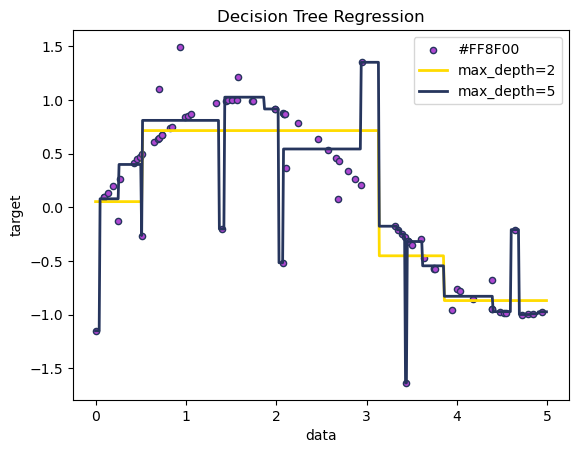

In [86]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Dimension Reduction: (Kernel PCA)

In [102]:
# Authors: Mathieu Blondel
#          Andreas Mueller
#          Guillaume Lemaitre
# License: BSD 3 clause

In [103]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

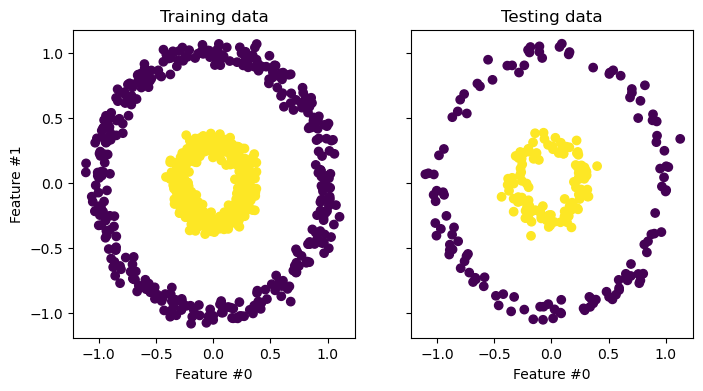

In [104]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [14]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

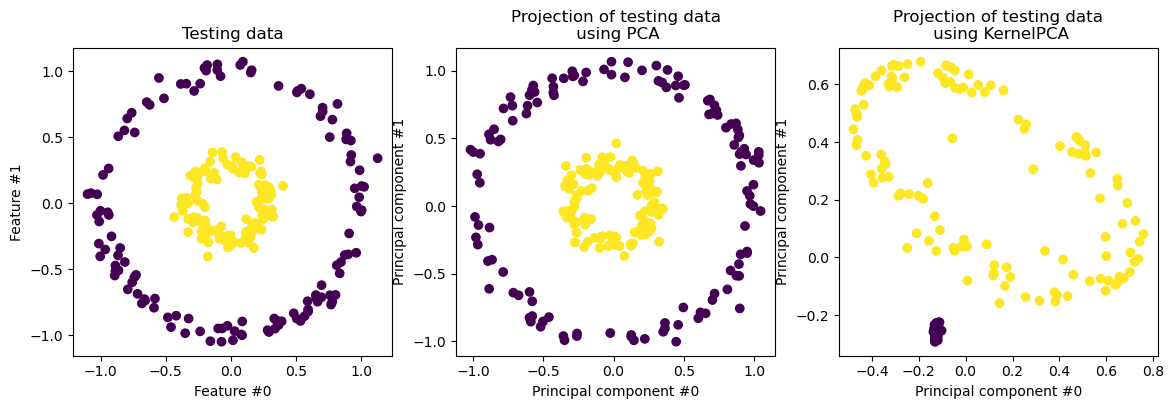

In [15]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

In [16]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

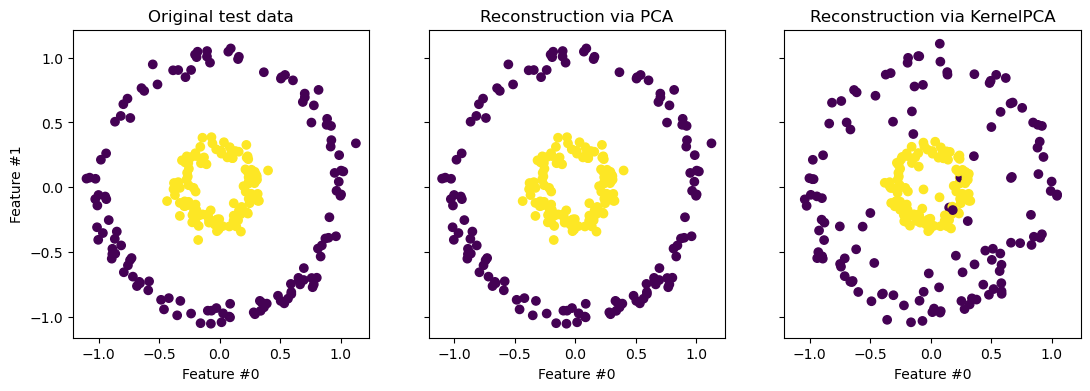

In [118]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

# Model Selection: cross_val_score and GridSearchCV

In [22]:
# Author: Raghav RV <rvraghav93@gmail.com>
# License: BSD

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [23]:
X, y = make_hastie_10_2(n_samples=8000, random_state=42)

# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True,
)
gs.fit(X, y)
results = gs.cv_results_

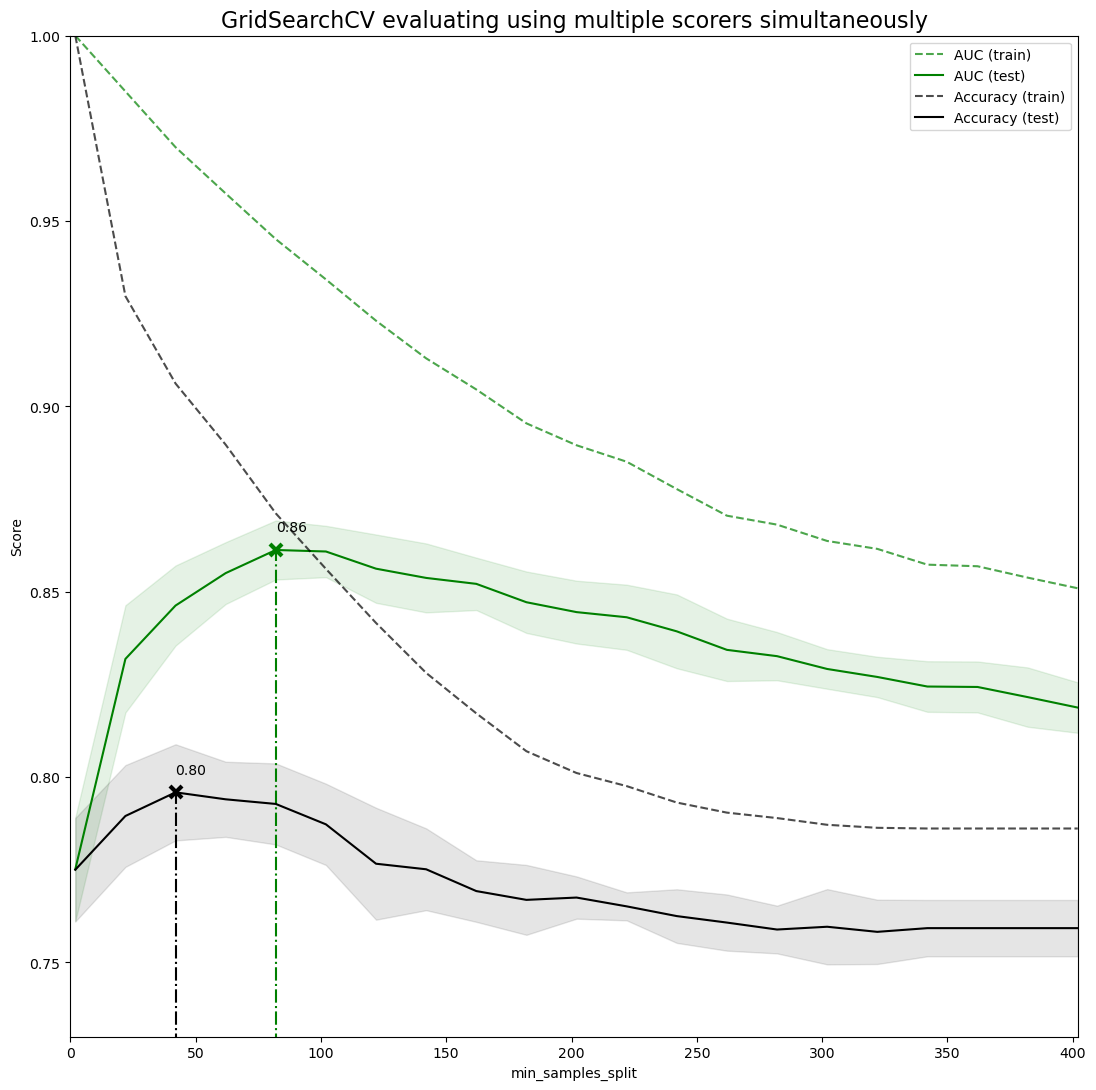

In [24]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)

for scorer, color in zip(sorted(scoring), ["g", "k"]):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=color,
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

# Preprocessing: Data Preprocessing

In [36]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

scaler.mean_

scaler.scale_

X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [143]:
X_scaled.mean(axis=0)

X_scaled.std(axis=0)

array([1., 1., 1.])

In [38]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

In [39]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [40]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [141]:
min_max_scaler.scale_

min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

In [142]:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'builtin_function_or_method'

In [ ]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs
max_abs_scaler.scale_

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100]) 

/Users/keanivansuaybaguio/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


array([4.3, 5.1, 5.8, 6.5, 7.9])

In [44]:
np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100])


array([0.        , 0.23873874, 0.50900901, 0.74324324, 1.        ])

In [45]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])


array([0.01351351, 0.25      , 0.47747748, 0.60472973, 0.94144144])

In [46]:
quantile_transformer = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=0)
X_trans = quantile_transformer.fit_transform(X)
quantile_transformer.quantiles_

/Users/keanivansuaybaguio/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


array([[4.3, 2. , 1. , 0.1],
       [4.4, 2.2, 1.1, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.5, 2.3, 1.3, 0.1],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5.1, 2.7, 1.5, 0.2],
       [5.1, 2.8, 1.5, 0.2],
       [5.1, 2

In [47]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [48]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

Normalizer()

In [49]:
normalizer.transform(X)

normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

In [50]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

In [51]:
enc = preprocessing.OrdinalEncoder()
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

In [52]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
enc = Pipeline(steps=[
    ("encoder", preprocessing.OrdinalEncoder()),
    ("imputer", SimpleImputer(strategy="constant", fill_value=-1)),
])
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

In [54]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

In [55]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [56]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])
# Note that for there are missing categorical values for the 2nd and 3rd
# feature
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

In [57]:
enc = preprocessing.OneHotEncoder(handle_unknown='infrequent_if_exist')
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 0., 0., 0.]])

In [58]:
X = [['male', 'from US', 'uses Safari'],
     ['female', 'from Europe', 'uses Firefox']]
drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
drop_enc.categories_
drop_enc.transform(X).toarray()

array([[1., 1., 1.],
       [0., 0., 0.]])

In [59]:
X = [['male', 'US', 'Safari'],
     ['female', 'Europe', 'Firefox'],
     ['female', 'Asia', 'Chrome']]
drop_enc = preprocessing.OneHotEncoder(drop='if_binary').fit(X)
drop_enc.categories_
drop_enc.transform(X).toarray()

array([[1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0.]])

In [60]:
drop_enc = preprocessing.OneHotEncoder(drop='first',
                                       handle_unknown='ignore').fit(X)
X_test = [['unknown', 'America', 'IE']]
drop_enc.transform(X_test).toarray()

/Users/keanivansuaybaguio/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0., 0., 0.]])

In [61]:
drop_enc = preprocessing.OneHotEncoder(drop='if_binary', sparse_output=False,
                                       handle_unknown='ignore').fit(X)
X_test = [['unknown', 'America', 'IE']]
X_trans = drop_enc.transform(X_test)
X_trans
drop_enc.inverse_transform(X_trans)

/Users/keanivansuaybaguio/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([['female', None, None]], dtype=object)

In [62]:
X = np.array([['dog'] * 5 + ['cat'] * 20 + ['rabbit'] * 10 +
              ['snake'] * 3], dtype=object).T
enc = preprocessing.OrdinalEncoder(min_frequency=6).fit(X)
enc.infrequent_categories_
enc.transform(np.array([['dog'], ['cat'], ['rabbit'], ['snake']]))

array([[2.],
       [0.],
       [1.],
       [2.]])

In [63]:
X_train = np.array(
    [["a"] * 5 + ["b"] * 20 + ["c"] * 10 + ["d"] * 3 + [np.nan]],
    dtype=object).T
enc = preprocessing.OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=3,
    max_categories=3, encoded_missing_value=4)
_ = enc.fit(X_train)
X_test = np.array([["a"], ["b"], ["c"], ["d"], ["e"], [np.nan]], dtype=object)
enc.transform(X_test)

array([[2.],
       [0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [64]:
enc = preprocessing.OneHotEncoder(min_frequency=6, sparse_output=False).fit(X)
enc.infrequent_categories_
enc.transform(np.array([['dog'], ['cat'], ['rabbit'], ['snake']]))

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [65]:
enc = preprocessing.OneHotEncoder(
   handle_unknown='infrequent_if_exist', sparse_output=False, min_frequency=6)
enc = enc.fit(X)
enc.transform(np.array([['dragon']]))

array([[0., 0., 1.]])

In [66]:
enc.get_feature_names_out()

array(['x0_cat', 'x0_rabbit', 'x0_infrequent_sklearn'], dtype=object)

In [67]:
enc = preprocessing.OneHotEncoder(max_categories=2, sparse_output=False)
enc = enc.fit(X)
enc.transform([['dog'], ['cat'], ['rabbit'], ['snake']])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [68]:
enc = preprocessing.OneHotEncoder(min_frequency=4, max_categories=3, sparse_output=False)
enc = enc.fit(X)
enc.transform([['dog'], ['cat'], ['rabbit'], ['snake']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [69]:
X = np.asarray([["a"] * 20 + ["b"] * 10 + ["c"] * 10 + ["d"] * 10], dtype=object).T
enc = preprocessing.OneHotEncoder(max_categories=3).fit(X)
enc.infrequent_categories_

[array(['b', 'c'], dtype=object)]

In [70]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)

In [71]:
est.transform(X)                      

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

In [72]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
bins = [0, 1, 13, 20, 60, np.inf]
labels = ['infant', 'kid', 'teen', 'adult', 'senior citizen']
transformer = preprocessing.FunctionTransformer(
    pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
)
X = np.array([0.2, 2, 15, 25, 97])
transformer.fit_transform(X)

['infant', 'kid', 'teen', 'adult', 'senior citizen']
Categories (5, object): ['infant' < 'kid' < 'teen' < 'adult' < 'senior citizen']

In [73]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer

binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [74]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [75]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [76]:
X = np.arange(9).reshape(3, 3)
X
poly = PolynomialFeatures(degree=3, interaction_only=True)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   2.,   0.],
       [  1.,   3.,   4.,   5.,  12.,  15.,  20.,  60.],
       [  1.,   6.,   7.,   8.,  42.,  48.,  56., 336.]])

In [77]:
import numpy as np
from sklearn.preprocessing import SplineTransformer
X = np.arange(5).reshape(5, 1)
X
spline = SplineTransformer(degree=2, n_knots=3)
spline.fit_transform(X)

array([[0.5  , 0.5  , 0.   , 0.   ],
       [0.125, 0.75 , 0.125, 0.   ],
       [0.   , 0.5  , 0.5  , 0.   ],
       [0.   , 0.125, 0.75 , 0.125],
       [0.   , 0.   , 0.5  , 0.5  ]])

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

In [80]:
import warnings
warnings.filterwarnings("error", message=".*check_inverse*.",
                        category=UserWarning, append=False)

# PART 2

# Modify the codes into the following specs: Color palette assigned for each group

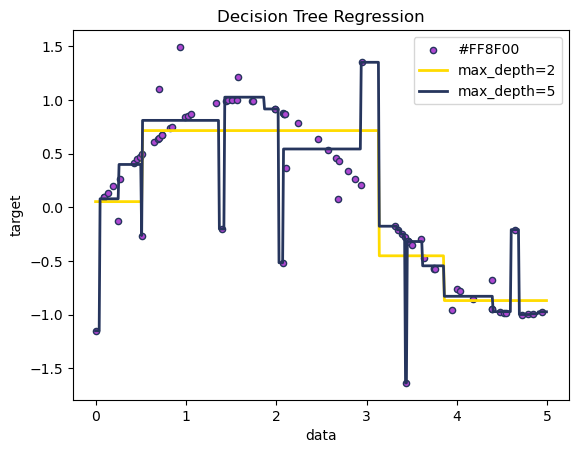

In [88]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, s=20, edgecolor="#26355D", c="#AF47D2", label="#FF8F00")
plt.plot(X_test, y_1, color="#FFDB00", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="#26355D", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

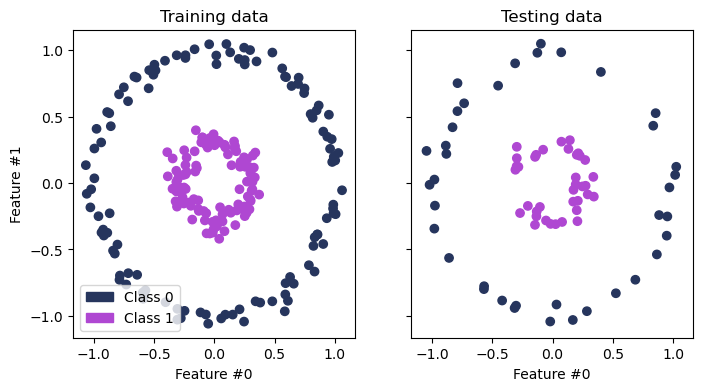

In [135]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

custom_colors = {
    0: '#26355D',
    1: '#AF47D2'   
}


_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))


train_scatter = train_ax.scatter(X_train[:, 0], X_train[:, 1], c=[custom_colors[label] for label in y_train])
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_scatter = test_ax.scatter(X_test[:, 0], X_test[:, 1], c=[custom_colors[label] for label in y_test])
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

import matplotlib.patches as mpatches

legend_handles = [mpatches.Patch(color=color, label=f'Class {label}') for label, color in custom_colors.items()]
train_ax.legend(handles=legend_handles)

plt.show()

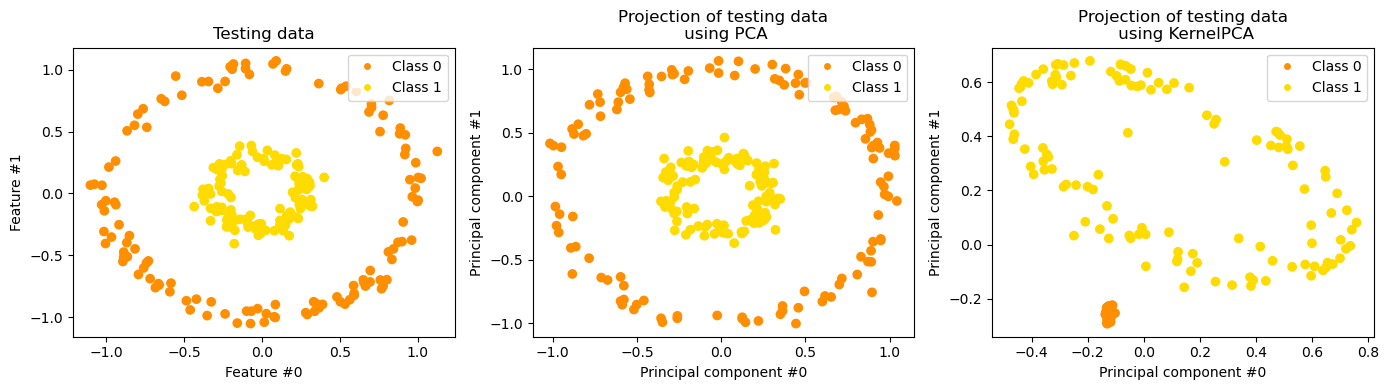

In [117]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

custom_colors = {
    0: '#FF8F00', 
    1: '#FFDB00'   
}

pca = PCA(n_components=2)
kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(ncols=3, figsize=(14, 4))

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=[custom_colors[label] for label in y_test])
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=[custom_colors[label] for label in y_test])
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=[custom_colors[label] for label in y_test])
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Class {label}', 
                              markerfacecolor=color) for label, color in custom_colors.items()]

orig_data_ax.legend(handles=legend_handles)
pca_proj_ax.legend(handles=legend_handles)
kernel_pca_proj_ax.legend(handles=legend_handles)

plt.tight_layout()
plt.show()

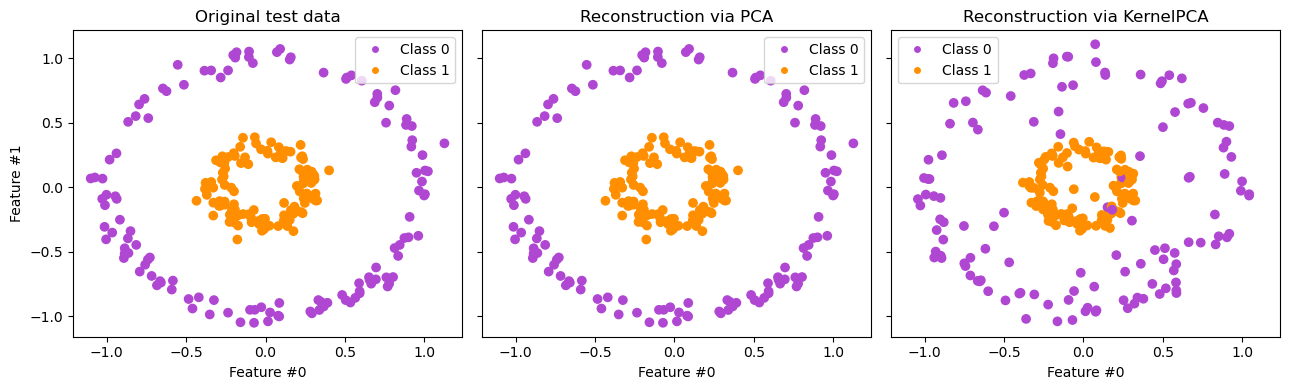

In [123]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

pca = PCA(n_components=2)
kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

pca.fit(X_train)

kernel_pca.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

custom_colors = {
    0: '#AF47D2',  
    1: '#FF8F00'  
}

fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=[custom_colors[label] for label in y_test])
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=[custom_colors[label] for label in y_test])
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=[custom_colors[label] for label in y_test]
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Class {label}', 
                              markerfacecolor=color) for label, color in custom_colors.items()]

orig_data_ax.legend(handles=legend_handles)
pca_back_proj_ax.legend(handles=legend_handles)
kernel_pca_back_proj_ax.legend(handles=legend_handles)

plt.tight_layout()
plt.show()

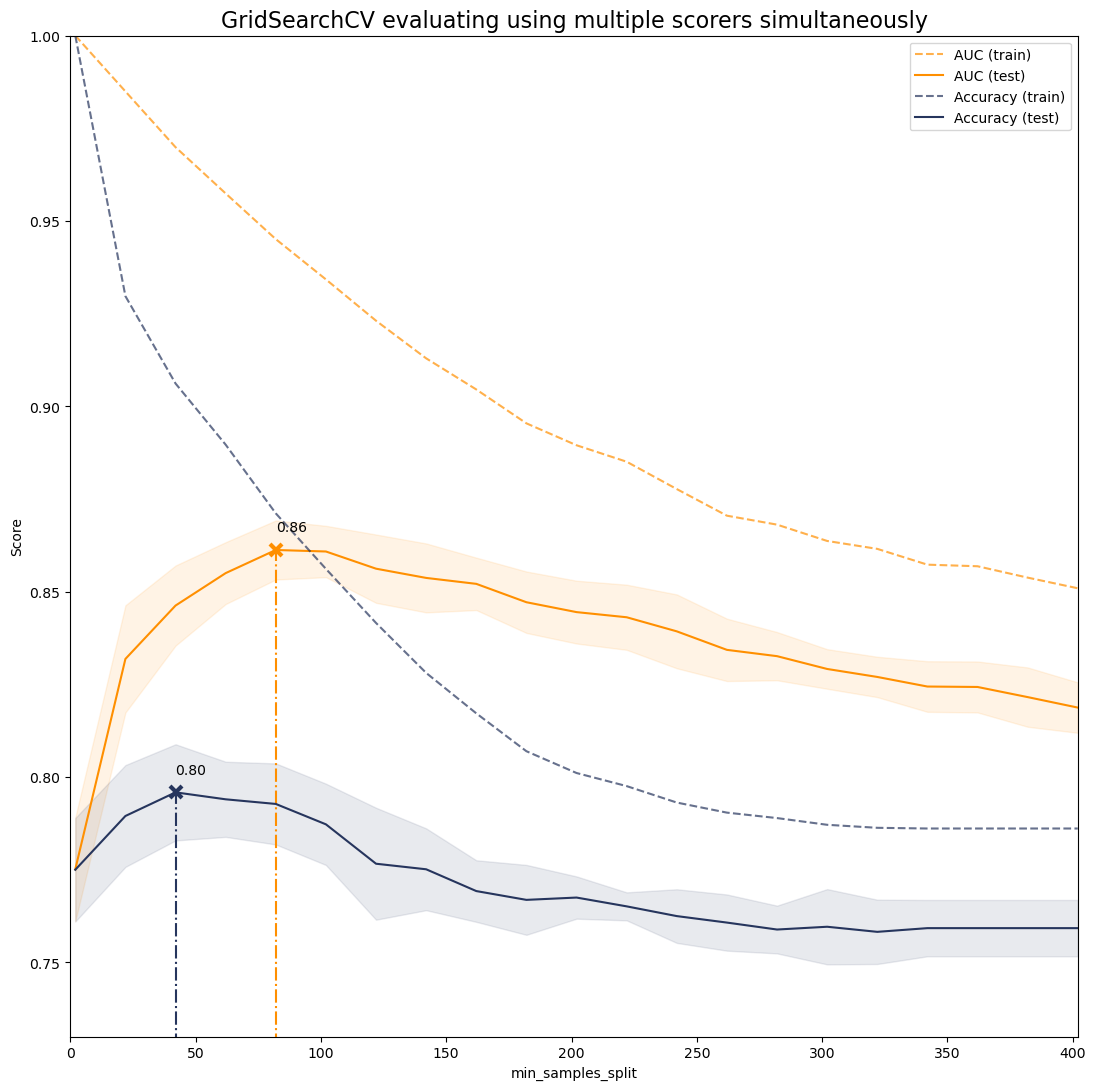

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_hastie_10_2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

X, y = make_hastie_10_2(n_samples=8000, random_state=42)

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True,
)


gs.fit(X, y)
results = gs.cv_results_


plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)


X_axis = np.array(results["param_min_samples_split"].data, dtype=float)


colors = {
    "AUC": "#FF8F00",        
    "Accuracy": "#26355D"    
}

for scorer in sorted(scoring):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=colors[scorer],
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=colors[scorer],
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]


    ax.plot(
        [
            X_axis[best_index],
        ] * 2,
        [0, best_score],
        linestyle="-.",
        color=colors[scorer],
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

# Modify the codes into the following specs: Random seed and n_samples (if applicable) assigned to each group

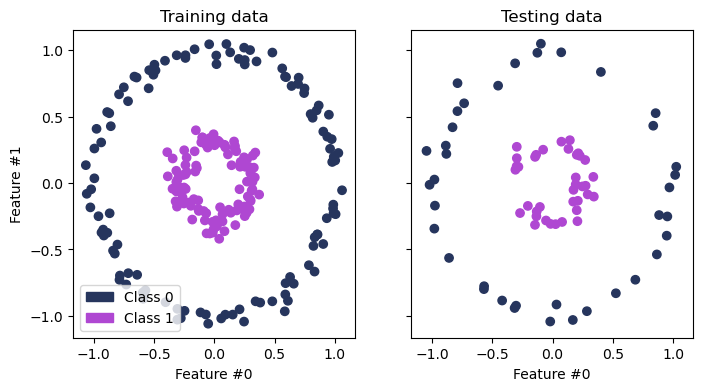

In [136]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=300, factor=0.3, noise=0.05, random_state=97)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=97)

custom_colors = {
    0: '#26355D',
    1: '#AF47D2'   
}


_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))


train_scatter = train_ax.scatter(X_train[:, 0], X_train[:, 1], c=[custom_colors[label] for label in y_train])
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_scatter = test_ax.scatter(X_test[:, 0], X_test[:, 1], c=[custom_colors[label] for label in y_test])
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

import matplotlib.patches as mpatches

legend_handles = [mpatches.Patch(color=color, label=f'Class {label}') for label, color in custom_colors.items()]
train_ax.legend(handles=legend_handles)

plt.show()

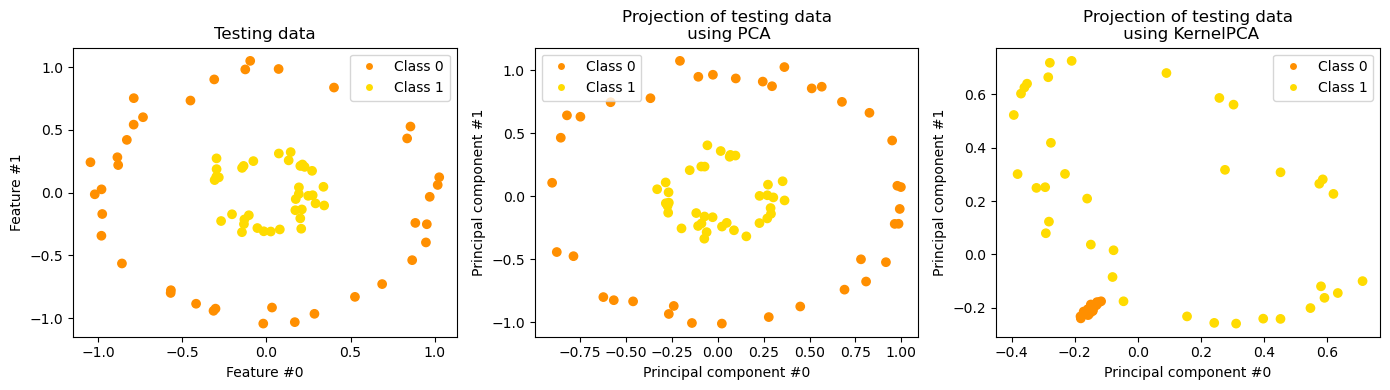

In [137]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=300, factor=0.3, noise=0.05, random_state=97)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=97)

custom_colors = {
    0: '#FF8F00',  
    1: '#FFDB00'   
}

pca = PCA(n_components=2)
kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(ncols=3, figsize=(14, 4))

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=[custom_colors[label] for label in y_test])
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=[custom_colors[label] for label in y_test])
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=[custom_colors[label] for label in y_test])
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Class {label}', 
                              markerfacecolor=color) for label, color in custom_colors.items()]

orig_data_ax.legend(handles=legend_handles)
pca_proj_ax.legend(handles=legend_handles)
kernel_pca_proj_ax.legend(handles=legend_handles)

plt.tight_layout()
plt.show()

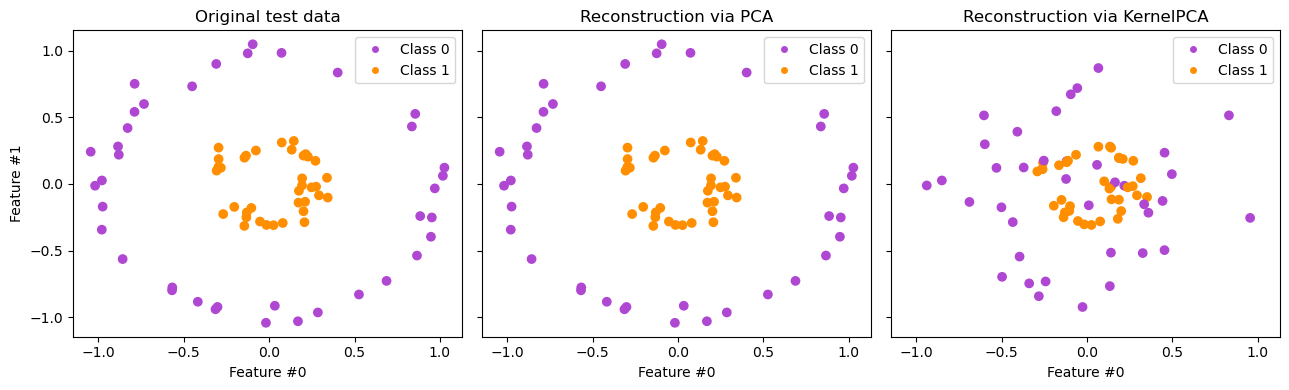

In [138]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=300, factor=0.3, noise=0.05, random_state=97)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=97)

pca = PCA(n_components=2)
kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

pca.fit(X_train)

kernel_pca.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

custom_colors = {
    0: '#AF47D2', 
    1: '#FF8F00'   
}

fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=[custom_colors[label] for label in y_test])
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=[custom_colors[label] for label in y_test])
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=[custom_colors[label] for label in y_test]
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Class {label}', 
                              markerfacecolor=color) for label, color in custom_colors.items()]

orig_data_ax.legend(handles=legend_handles)
pca_back_proj_ax.legend(handles=legend_handles)
kernel_pca_back_proj_ax.legend(handles=legend_handles)

plt.tight_layout()
plt.show()

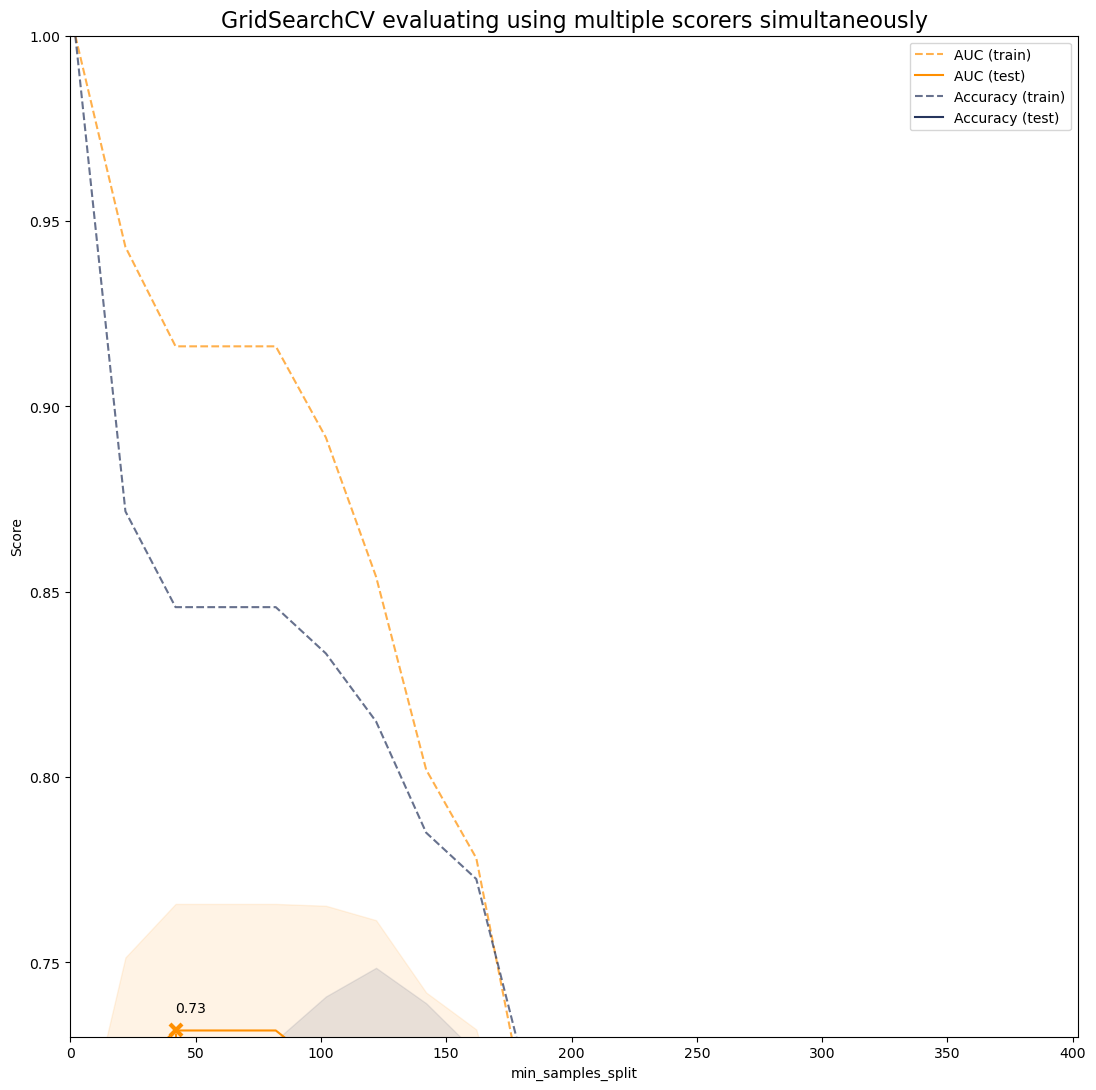

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_hastie_10_2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

X, y = make_hastie_10_2(n_samples=300, random_state=97)

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True,
)


gs.fit(X, y)
results = gs.cv_results_


plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)


X_axis = np.array(results["param_min_samples_split"].data, dtype=float)


colors = {
    "AUC": "#FF8F00",        
    "Accuracy": "#26355D"    
}

for scorer in sorted(scoring):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=colors[scorer],
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=colors[scorer],
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]


    ax.plot(
        [
            X_axis[best_index],
        ] * 2,
        [0, best_score],
        linestyle="-.",
        color=colors[scorer],
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

# Modify the codes into the following specs: Create your own synthetic data and/or use a Kaggle Dataset, and run 2 out of the 6 methods described above, according to your groupings

# Preprocessing

# Dataset: https://drive.google.com/file/d/1FGuvgIc89i2UqaA9Ng6PkIRcxNgYGOEd/view?usp=sharing

# Categorizing Variables

In [157]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

file_path = '/Users/keanivansuaybaguio/Desktop/StudentPerformanceFactors.csv'
df = pd.read_csv('/Users/keanivansuaybaguio/Desktop/StudentPerformanceFactors.csv')

categorical_cols_ordinal = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 
                            'Family_Income', 'Teacher_Quality', 'Parental_Education_Level', 
                            'Distance_from_Home']
categorical_cols_nominal = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 
                            'Peer_Influence', 'Learning_Disabilities', 'Gender']

ordinal_mapping = [
    ['Low', 'Medium', 'High'], 
    ['Low', 'Medium', 'High'], 
    ['Low', 'Medium', 'High'],  
    ['Low', 'Medium', 'High'],  
    ['Low', 'Medium', 'High'], 
    ['High School', 'College', 'Postgraduate'],  
    ['Near', 'Moderate', 'Far'] 
]

imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols_ordinal] = imputer.fit_transform(df[categorical_cols_ordinal])

ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping)
df[categorical_cols_ordinal] = ordinal_encoder.fit_transform(df[categorical_cols_ordinal])

onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  
onehot_encoded = onehot_encoder.fit_transform(df[categorical_cols_nominal])

onehot_columns = onehot_encoder.get_feature_names_out(categorical_cols_nominal)

df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_columns, index=df.index)

df = pd.concat([df, df_onehot], axis=1)
df.drop(columns=categorical_cols_nominal, inplace=True)

print(df.head())



   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                   0.0                  2.0   
1             19          64                   0.0                  1.0   
2             24          98                   1.0                  1.0   
3             29          89                   0.0                  1.0   
4             19          92                   1.0                  1.0   

   Sleep_Hours  Previous_Scores  Motivation_Level  Tutoring_Sessions  \
0            7               73               0.0                  0   
1            8               59               0.0                  2   
2            7               91               1.0                  2   
3            8               98               1.0                  1   
4            6               65               1.0                  3   

   Family_Income  Teacher_Quality  ...  Parental_Education_Level  \
0            0.0              1.0  ...          

# Numerical Scaling

In [158]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 
                  'Physical_Activity', 'Exam_Score']  # Exam_Score is the target

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.504942    0.348375                   0.0                  2.0   
1      -0.162822   -1.383736                   0.0                  1.0   
2       0.671882    1.560853                   1.0                  1.0   
3       1.506587    0.781403                   0.0                  1.0   
4      -0.162822    1.041220                   1.0                  1.0   

   Sleep_Hours  Previous_Scores  Motivation_Level  Tutoring_Sessions  \
0    -0.019796        -0.143800               0.0          -1.213934   
1     0.661399        -1.116110               0.0           0.411451   
2    -0.019796         1.106313               1.0           0.411451   
3     0.661399         1.592469               1.0          -0.401242   
4    -0.700990        -0.699406               1.0           1.224144   

   Family_Income  Teacher_Quality  ...  Parental_Education_Level  \
0            0.0              1.0  ...          

# Handling Missing Values

In [159]:
from sklearn.impute import SimpleImputer

print(df.isnull().sum())

numerical_imputer = SimpleImputer(strategy='mean')  # Or use strategy='median'
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols_ordinal] = categorical_imputer.fit_transform(df[categorical_cols_ordinal])

print(df.head())


Hours_Studied                     0
Attendance                        0
Parental_Involvement              0
Access_to_Resources               0
Sleep_Hours                       0
Previous_Scores                   0
Motivation_Level                  0
Tutoring_Sessions                 0
Family_Income                     0
Teacher_Quality                   0
Physical_Activity                 0
Parental_Education_Level          0
Distance_from_Home                0
Exam_Score                        0
Extracurricular_Activities_Yes    0
Internet_Access_Yes               0
School_Type_Public                0
Peer_Influence_Neutral            0
Peer_Influence_Positive           0
Learning_Disabilities_Yes         0
Gender_Male                       0
dtype: int64
   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.504942    0.348375                   0.0                  2.0   
1      -0.162822   -1.383736                   0.0                  1.0   
2     

# Classification

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.46      0.69      0.55        26
         1.0       0.62      0.38      0.47        34

    accuracy                           0.52        60
   macro avg       0.54      0.54      0.51        60
weighted avg       0.55      0.52      0.51        60

Accuracy Score:
0.5166666666666667


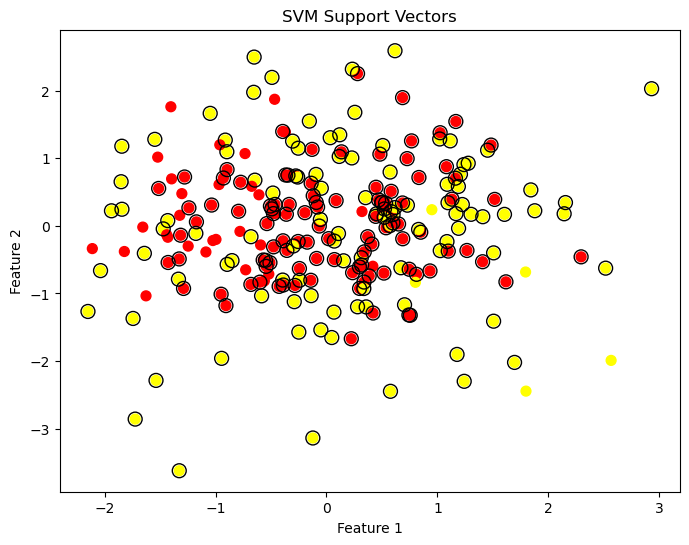

Support Vectors:
[[-0.3919077  -0.22072375  0.34814604 ...  0.15882446 -0.54121623
   0.38966933]
 [-0.46404844  0.31683707  1.08509195 ... -0.97154361 -1.37598526
  -0.82910336]
 [ 1.4077475  -0.53034579  1.46692939 ...  0.03026421 -0.49081621
  -0.43618209]
 ...
 [-0.58541519 -1.03496353  1.15792577 ... -0.38867181 -1.11518124
  -1.11251142]
 [-1.3349791  -0.78820814  0.69712348 ...  0.81491864  0.33082905
   0.39027173]
 [ 1.69600153 -2.01960361 -1.97359661 ...  0.13582123  0.09361002
  -2.23238438]]
Support Vector Indices:
[  2   5   7   9  10  20  22  27  28  30  31  33  34  36  39  41  43  44
  45  48  49  53  57  58  62  67  70  71  72  75  78  82  86  88  90  91
  96  97  98 101 103 106 107 108 110 114 115 116 119 125 129 131 132 135
 137 138 140 141 142 143 144 148 149 151 156 158 160 162 165 166 167 172
 179 181 182 186 189 190 192 196 198 204 205 206 207 208 210 211 213 214
 215 216 218 219 221 222 223 224 229 230 232 236 239   1   3   4   6   8
  11  13  14  15  16  17  18 

In [164]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

file_path = '/Users/keanivansuaybaguio/Desktop/StudentPerformanceFactors.csv'
df = pd.read_csv('/Users/keanivansuaybaguio/Desktop/StudentPerformanceFactors.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = svm.SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

support_vectors = clf.support_vectors_

plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='black')
plt.title("SVM Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Support Vectors:")
print(clf.support_vectors_)

print("Support Vector Indices:")
print(clf.support_)

print("Number of Support Vectors for Each Class:")
print(clf.n_support_)
